<a href="https://colab.research.google.com/github/Yassin1-prog/EDA-Wildfires-Greece/blob/main/Greek_Wildfires_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of wildfires in Greece** 🌳🔥
###Exploratory Data Analysis (EDA) of Greek wildfire data from 2019-2024 to identify factors contributing to large fires.

#Initial Data Assesment



Φωρτώνουμε το σύνολο δεδομένων το οποίο έχει συλλεχθεί απο https://www.fireservice.gr/el/synola-dedomenon για τα έτη 2019-2024. (Η μετατροπή σε csv και το merge έχουν είδη γίνει)

In [ ]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv("wildfiresGR.csv", low_memory=False, na_values=['Not Found'])
df.drop(index=21206, inplace=True) # most of the vechiles are null there

In [ ]:
df.shape

(58702, 38)

In [ ]:
df.tail()

,Α/Α ΕΓΓΡΑΦΗΣ,Α/Α ENGAGE,X-ENGAGE,Y-ENGAGE,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.,ΜΙΣΘ. ΕΛΙΚΟΠΤ.,ΜΙΣΘ. ΑΕΡΟΣΚ.
58698,2018123.0,1227154.0,20.878877,37.745634,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,10/07/2024,13:08,10/07/2024,14:25,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,Τ.Κ.ΑΜΠΕΛΟΚΗΠΩΝ,0.00,0.0,0.0,0.00,0.03,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58699,2023999.0,1232674.0,20.776636,37.750583,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,10/26/2024,20:18,10/27/2024,19:37,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,Τ.Κ. ΚΟΙΛΙΩΜΕΝΟΥ,0.00,0.5,0.0,0.00,0.00,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58700,2034292.0,1242147.0,20.883848,37.808427,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,11/02/2024,12:25,11/25/2024,13:49,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,ΑΚΡΩΤΗΡΙ,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58701,1952074.0,1146350.0,20.651565,37.868703,Π.Κ. ΕΛΑΤΙΩΝ,ΖΑΚΥΝΘΟΥ,02/01/2024,20:15,02/01/2024,21:06,NaN,Δ. ΖΑΚΥΝΘΟΥ,ΑΝΩ ΒΟΛΙΜΕΣ,Τ.Κ. ΒΟΛΙΜΩΝ,0.02,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58702,1952227.0,1149275.0,20.653435,37.815964,Π.Κ. ΕΛΑΤΙΩΝ,ΖΑΚΥΝΘΟΥ,02/10/2024,18:57,02/14/2024,08:19,NaN,Δ. ΖΑΚΥΝΘΟΥ,ΕΞΩ ΧΩΡΑ,ΕΞΩ ΧΩΡΑ (ΛΑΚΚΟΣ),0.00,170.0,0.0,0.00,0.00,0.0,0.0,0.0,40.0,0.0,8.0,0.0,3.0,17,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58702 entries, 0 to 58702
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Α/Α ΕΓΓΡΑΦΗΣ              49202 non-null  float64
 1   Α/Α ENGAGE                49202 non-null  float64
 2   X-ENGAGE                  47361 non-null  float64
 3   Y-ENGAGE                  47361 non-null  float64
 4   Υπηρεσία                  58702 non-null  object 
 5   Νομός                     58702 non-null  object 
 6   Ημερ/νία Έναρξης          58702 non-null  object 
 7   Ώρα Έναρξης               58702 non-null  object 
 8   Ημερ/νία Κατασβεσης       43883 non-null  object 
 9   Ώρα Κατάσβεσης            43777 non-null  object 
 10  Δασαρχείο                 10365 non-null  object 
 11  Δήμος                     58702 non-null  object 
 12  Περιοχή                   30971 non-null  object 
 13  Διεύθυνση                 58702 non-null  object 
 14  Δάση       

In [ ]:
df.describe()

,Α/Α ΕΓΓΡΑΦΗΣ,Α/Α ENGAGE,X-ENGAGE,Y-ENGAGE,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.,ΜΙΣΘ. ΕΛΙΚΟΠΤ.,ΜΙΣΘ. ΑΕΡΟΣΚ.
count,4.920200e+04,4.920200e+04,47361.000000,47361.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58693.000000,58682.000000,58702.000000,58702.000000,58702.000000,58702.000000,27890.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,58702.000000,30815.000000,30815.000000
mean,1.770919e+06,1.955076e+07,21.939300,37.330130,19.375226,29.523132,0.010664,7.659523,1.031159,11.619513,3.235847,0.037155,5.919462,0.591817,0.207642,0.038380,0.286072,2.640643,0.119864,0.077391,0.049453,0.040305,0.019045,0.016763,0.029573,0.000630,0.034237,0.033847
std,1.527506e+05,4.107137e+09,4.771213,7.836694,1851.607589,1983.354565,1.328496,380.804619,19.842023,793.562315,140.091822,1.636363,15.620196,5.666823,1.779674,1.482173,5.968071,4.519528,1.381954,0.685391,0.464758,0.499171,0.558692,0.230230,0.293327,0.060797,0.926992,0.807042
min,1.526610e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.640781e+06,8.254068e+05,21.553855,37.652077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.768625e+06,9.611940e+05,22.400661,38.626752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.900214e+06,1.098460e+06,23.693426,40.534386,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.047844e+06,9.110230e+11,28.237894,41.743746,316583.000000,425204.000000,300.000000,63989.000000,2166.000000,170224.270000,23960.000000,300.000000,1560.000000,620.000000,206.000000,160.000000,1270.000000,230.000000,109.000000,68.000000,32.000000,29.000000,120.000000,15.000000,34.000000,12.000000,147.000000,125.000000


In [ ]:
df.describe(include=['object'])

,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση
count,58702,58702,58702,58702,43883,43777,10365,58702,30971,58702
unique,278,52,2169,1385,2155,1367,311,307,2922,27543
top,Π.Υ. ΚΑΛΑΜΑΤΑΣ,ΗΛΕΙΑΣ,11/05/2022,18:00,11/05/2022,19:00,ΚΑΛΑΜΑΤΑΣ,Δ. ΠΥΡΓΟΥ,-,ΑΓΡΟΤΙΚΗ ΠΕΡΙΟΧΗ ΧΡΥΣΟΥΠΟΛΗΣ
freq,2292,4607,136,388,109,388,831,1707,5660,188


In [ ]:
df.isnull().sum()

,0
Α/Α ΕΓΓΡΑΦΗΣ,9500
Α/Α ENGAGE,9500
X-ENGAGE,11341
Y-ENGAGE,11341
Υπηρεσία,0
Νομός,0
Ημερ/νία Έναρξης,0
Ώρα Έναρξης,0
Ημερ/νία Κατασβεσης,14819
Ώρα Κατάσβεσης,14925


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Α/Α ΕΓΓΡΑΦΗΣ,49202
Α/Α ENGAGE,48686
X-ENGAGE,45389
Y-ENGAGE,45389
Υπηρεσία,278
Νομός,52
Ημερ/νία Έναρξης,2169
Ώρα Έναρξης,1385
Ημερ/νία Κατασβεσης,2155
Ώρα Κατάσβεσης,1367


# Data Cleaning

In [ ]:
columns_to_drop = ["Α/Α ΕΓΓΡΑΦΗΣ", "Α/Α ENGAGE", "Δασαρχείο", "ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# replace null values in the Περιοχη column with a new category unknown
df.fillna({'Περιοχή': 'Unknown'}, inplace=True)

In [ ]:
# Combine start date + time
df["Start_Datetime"] = pd.to_datetime(
    df["Ημερ/νία Έναρξης"] + " " + df["Ώρα Έναρξης"],
    format="%m/%d/%Y %H:%M"
)

# Combine end date + time (handle nulls)
df["End_Datetime"] = pd.to_datetime(
    df["Ημερ/νία Κατασβεσης"] + " " + df["Ώρα Κατάσβεσης"],
    format="%m/%d/%Y %H:%M",
    errors="coerce"  # Leaves NaT (Not a Time) for nulls
)

# Duration in hours (NaN for unresolved fires)
df["Duration_hours"] = (
    (df["End_Datetime"] - df["Start_Datetime"]).dt.total_seconds() / 3600
)

# Extract useful temporal features
df["Start_Hour"] = df["Start_Datetime"].dt.hour
df["Start_Month"] = df["Start_Datetime"].dt.month
df["Day_of_Week"] = df["Start_Datetime"].dt.day_name()

df.drop(columns=[
    "Ημερ/νία Έναρξης",
    "Ώρα Έναρξης",
    "Ημερ/νία Κατασβεσης",
    "Ώρα Κατάσβεσης"
], inplace = True)

In [ ]:
#df["MISSING_COORDS"] = df["X-ENGAGE"].isna() | df["Y-ENGAGE"].isna()
df["MISSING_COORDS"] = (df["X-ENGAGE"].isna() | df["Y-ENGAGE"].isna()).astype(int)

In [ ]:
# use median imputations for specific median columns
columns_to_impute = ['ΜΙΣΘ. ΑΕΡΟΣΚ.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ']
df[columns_to_impute] = df[columns_to_impute].fillna(df[columns_to_impute].median())

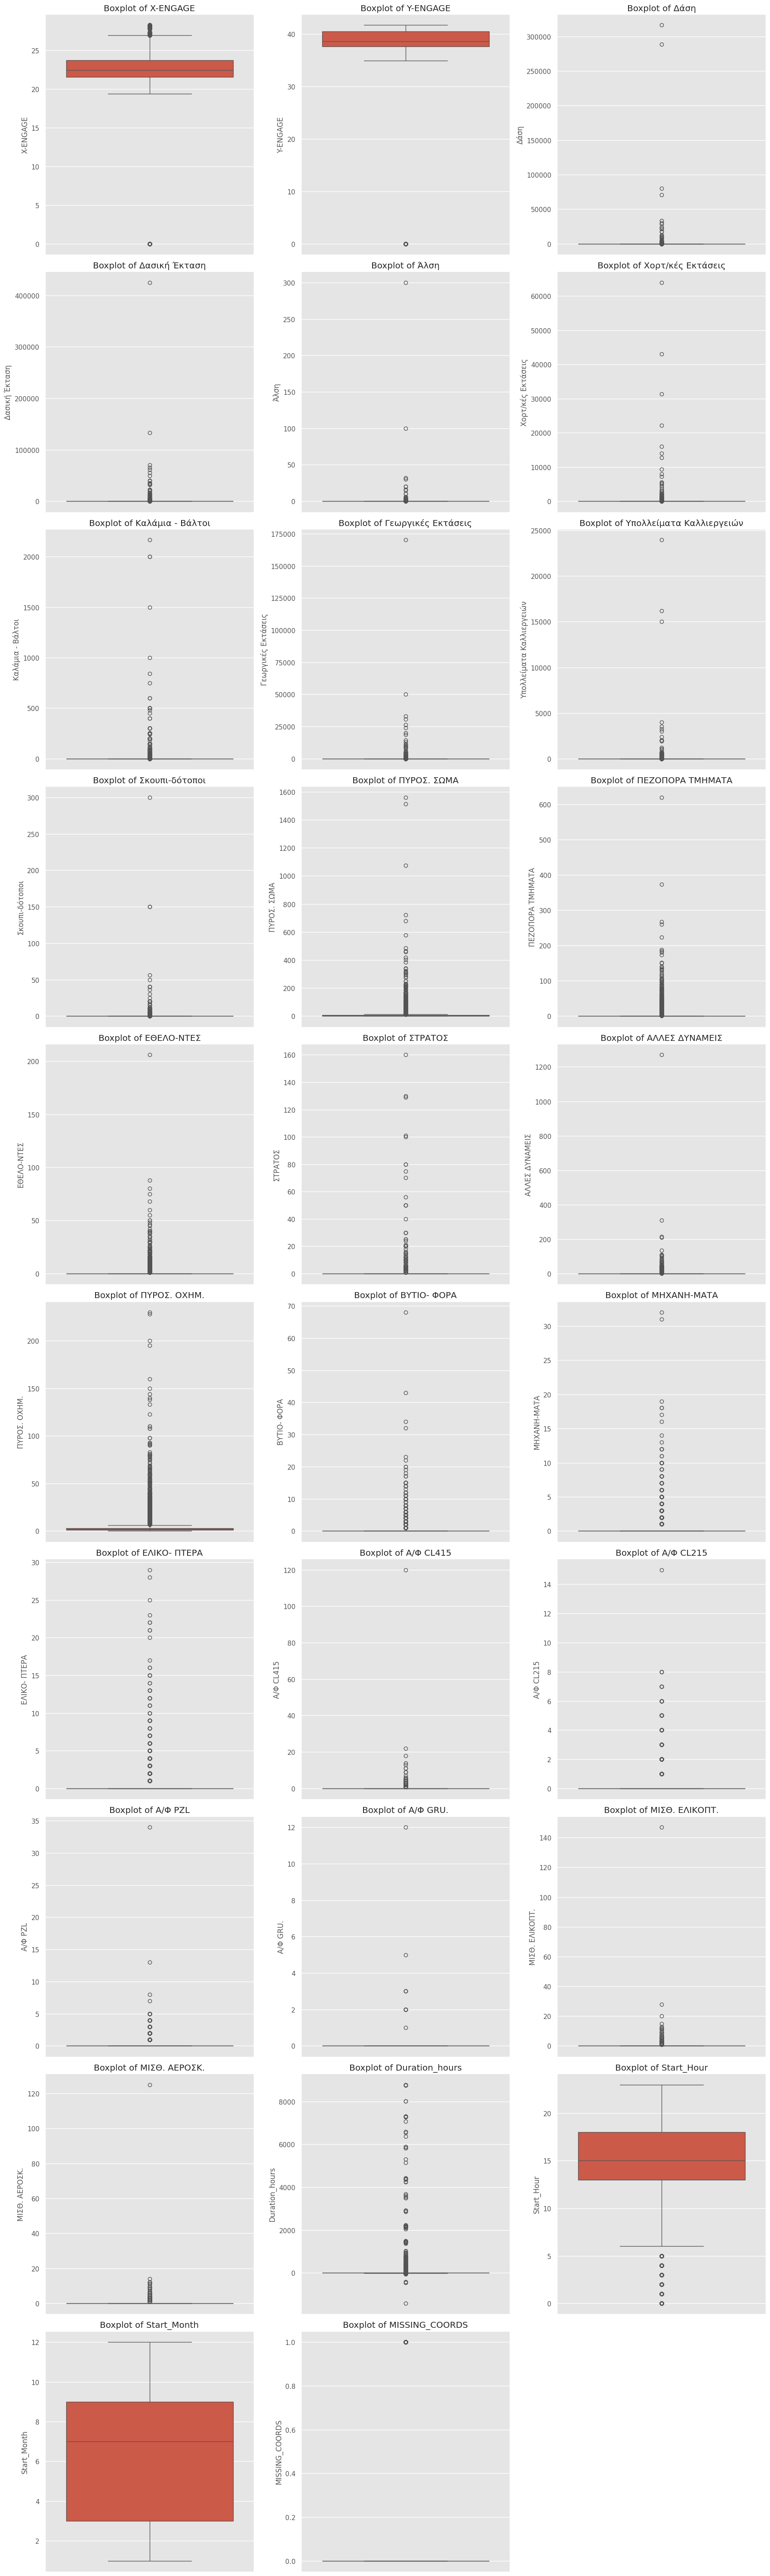

In [ ]:
# detect outliers
def plot_numerical_boxplots(df):
    """Generates box plots for all numerical columns in the DataFrame in a grid."""
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))  # Create grid
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i])  # Plot on the current subplot
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

    # Hide any empty subplots if the number of plots isn't divisible by 3
    for j in range(num_plots, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

plot_numerical_boxplots(df)

In [ ]:
# feature engineering
df['Season'] = df['Start_Datetime'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
})

df['Unresolved'] = df['Duration_hours'].isna().astype(int) # check if its related with missing coordinates

df['Total_Personnel'] = df['ΠΥΡΟΣ. ΣΩΜΑ'] + df['ΕΘΕΛΟ-ΝΤΕΣ'] + df['ΣΤΡΑΤΟΣ'] + df['ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ'] + df['ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ']

df['Aircraft_Used'] = (df[['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']].sum(axis=1) > 0).astype(int)
df['Total_Aircraft_Used'] = df[['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL','Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.' ]].sum(axis=1)

# Total area impacted (sum all land columns)
land_columns = ['Δάση', 'Δασική Έκταση', 'Χορτ/κές Εκτάσεις', 'Άλση', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις', 'Υπολλείματα Καλλιεργειών', 'Σκουπι-δότοποι']
df['Total_Area_Impacted'] = df[land_columns].sum(axis=1)

# Dominant land type
df['Dominant_Land_Type'] = df[land_columns].idxmax(axis=1)

# alternative for the unknown category
#df['Location'] = df['Περιοχή'].fillna(df['Δήμος'] + ' (General Area)')

In [ ]:
# Columns to convert to 'category'
categorical_cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
                    'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']

# Loop through columns and convert
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Univariate Analysis

In [ ]:
from datetime import datetime
import plotly.express as px
from matplotlib.ticker import MaxNLocator

sns.set_palette("viridis")

In [ ]:
# For spatial data specifically, add this function
def analyze_coordinates_greece(df, lat_col='latitude', lon_col='longitude'):
    """
    Specialized analysis for spatial coordinates of wildfires in Greece

    Parameters:
    df (pandas.DataFrame): DataFrame containing wildfire data in Greece
    lat_col (str): Name of latitude column
    lon_col (str): Name of longitude column
    """
    print(f"\n{'='*50}")
    print(f"Spatial Coordinates Analysis for Greek Wildfires: {lat_col} & {lon_col}")
    print(f"{'='*50}")

    # Check for missing coordinates
    missing_lat = df[lat_col].isnull().sum()
    missing_lon = df[lon_col].isnull().sum()

    print(f"Missing latitude values: {missing_lat} ({missing_lat/len(df)*100:.2f}%)")
    print(f"Missing longitude values: {missing_lon} ({missing_lon/len(df)*100:.2f}%)")

    # Filter rows with valid coordinates
    valid_coords = df.dropna(subset=[lat_col, lon_col])
    print(f"Records with valid coordinates: {len(valid_coords)} ({len(valid_coords)/len(df)*100:.2f}%)")

    if len(valid_coords) > 0:
        # Greece-specific coordinate validation
        # Greece's approximate bounding box: lat 34-42°N, lon 19-30°E
        greece_lat_min, greece_lat_max = 34.0, 42.0
        greece_lon_min, greece_lon_max = 19.0, 30.0

        # Coordinate statistics within Greece's bounds
        print("\nCoordinate Ranges (Greece):")
        print(f"Expected latitude range: {greece_lat_min:.1f}°N to {greece_lat_max:.1f}°N")
        print(f"Expected longitude range: {greece_lon_min:.1f}°E to {greece_lon_max:.1f}°E")
        print(f"Actual latitude range: {valid_coords[lat_col].min():.4f} to {valid_coords[lat_col].max():.4f}")
        print(f"Actual longitude range: {valid_coords[lon_col].min():.4f} to {valid_coords[lon_col].max():.4f}")

        # Check for coordinates outside Greece
        outside_greece = valid_coords[
            (valid_coords[lat_col] < greece_lat_min) |
            (valid_coords[lat_col] > greece_lat_max) |
            (valid_coords[lon_col] < greece_lon_min) |
            (valid_coords[lon_col] > greece_lon_max)
        ]

        if len(outside_greece) > 0:
            print(f"\nWARNING: {len(outside_greece)} records ({len(outside_greece)/len(valid_coords)*100:.2f}%) have coordinates outside Greece's boundaries")
            print("These may be errors or fires in neighboring countries")

        # Regional analysis
        if len(valid_coords) > 10:
            # Administrative regions of Greece (approximate central coordinates)
            # This helps understand which regions are most affected
            regions = {
                'Attica': (37.98, 23.73),
                'Central Greece': (38.50, 22.75),
                'Central Macedonia': (40.62, 23.00),
                'Crete': (35.21, 24.91),
                'Eastern Macedonia and Thrace': (41.12, 24.89),
                'Epirus': (39.67, 20.85),
                'Ionian Islands': (38.18, 20.59),
                'North Aegean': (39.10, 26.55),
                'Peloponnese': (37.35, 22.14),
                'South Aegean': (36.85, 25.15),
                'Thessaly': (39.63, 22.42),
                'Western Greece': (38.51, 21.57),
                'Western Macedonia': (40.30, 21.79)
            }

            # Density heatmap showing wildfire hotspots
            plt.figure(figsize=(12, 10))
            sns.kdeplot(
                x=valid_coords[lon_col],
                y=valid_coords[lat_col],
                cmap="Reds",
                fill=True,
                thresh=0
            )

            # Plot region centers for reference
            for region, (lat, lon) in regions.items():
                plt.plot(lon, lat, 'bo', markersize=5)
                plt.text(lon, lat, region, fontsize=8, ha='center')

            plt.title('Density of Wildfire Occurrences in Greece by Region')
            plt.xlabel('Longitude (°E)')
            plt.ylabel('Latitude (°N)')
            plt.xlim(greece_lon_min - 0.5, greece_lon_max + 0.5)
            plt.ylim(greece_lat_min - 0.5, greece_lat_max + 0.5)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            # Calculate distance from major urban centers
            def haversine_distance(lat1, lon1, lat2, lon2):
                """Calculate the distance between two points on Earth's surface in km"""
                from math import radians, cos, sin, asin, sqrt
                R = 6371  # Earth radius in kilometers

                # Convert decimal degrees to radians
                lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

                # Haversine formula
                dlon = lon2 - lon1
                dlat = lat2 - lat1
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a))
                distance = R * c

                return distance

            # Major cities in Greece
            cities = {
                'Athens': (37.98, 23.73),
                'Thessaloniki': (40.64, 22.94),
                'Patras': (38.25, 21.74),
                'Heraklion': (35.34, 25.14),
                'Larissa': (39.64, 22.42)
            }

            # Calculate distance to nearest major city
            valid_coords['nearest_city'] = None
            valid_coords['nearest_city_distance_km'] = float('inf')

            for idx, row in valid_coords.iterrows():
                for city, (city_lat, city_lon) in cities.items():
                    distance = haversine_distance(
                        row[lat_col], row[lon_col],
                        city_lat, city_lon
                    )
                    if distance < valid_coords.loc[idx, 'nearest_city_distance_km']:
                        valid_coords.loc[idx, 'nearest_city'] = city
                        valid_coords.loc[idx, 'nearest_city_distance_km'] = distance

            # Distribution of wildfires by nearest city
            plt.figure(figsize=(10, 6))
            city_counts = valid_coords['nearest_city'].value_counts()
            ax = sns.barplot(x=city_counts.index, y=city_counts.values)
            plt.title('Wildfire Distribution by Nearest Major City')
            plt.xlabel('Nearest City')
            plt.ylabel('Number of Wildfires')
            plt.xticks(rotation=45)

            # Add count labels
            for i, v in enumerate(city_counts.values):
                ax.text(i, v + 0.1, str(v), ha='center')

            plt.tight_layout()
            plt.show()


Spatial Coordinates Analysis for Greek Wildfires: Y-ENGAGE & X-ENGAGE
Missing latitude values: 11341 (19.32%)
Missing longitude values: 11341 (19.32%)
Records with valid coordinates: 47361 (80.68%)

Coordinate Ranges (Greece):
Expected latitude range: 34.0°N to 42.0°N
Expected longitude range: 19.0°E to 30.0°E
Actual latitude range: 0.0000 to 41.7437
Actual longitude range: 0.0000 to 28.2379

These may be errors or fires in neighboring countries


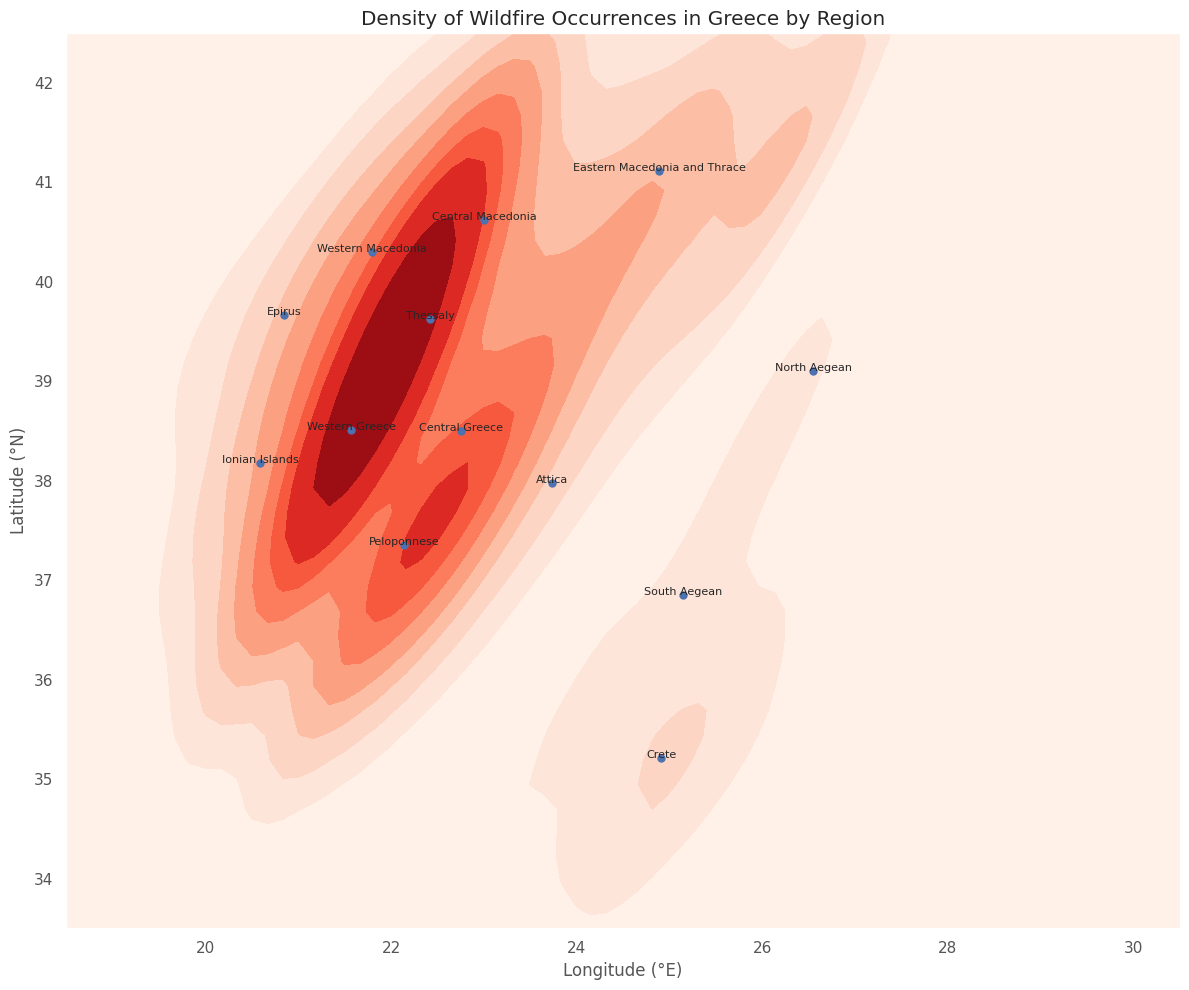

<ipython-input-42-5f15a8ca0f7c>:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_coords['nearest_city'] = None
<ipython-input-42-5f15a8ca0f7c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_coords['nearest_city_distance_km'] = float('inf')


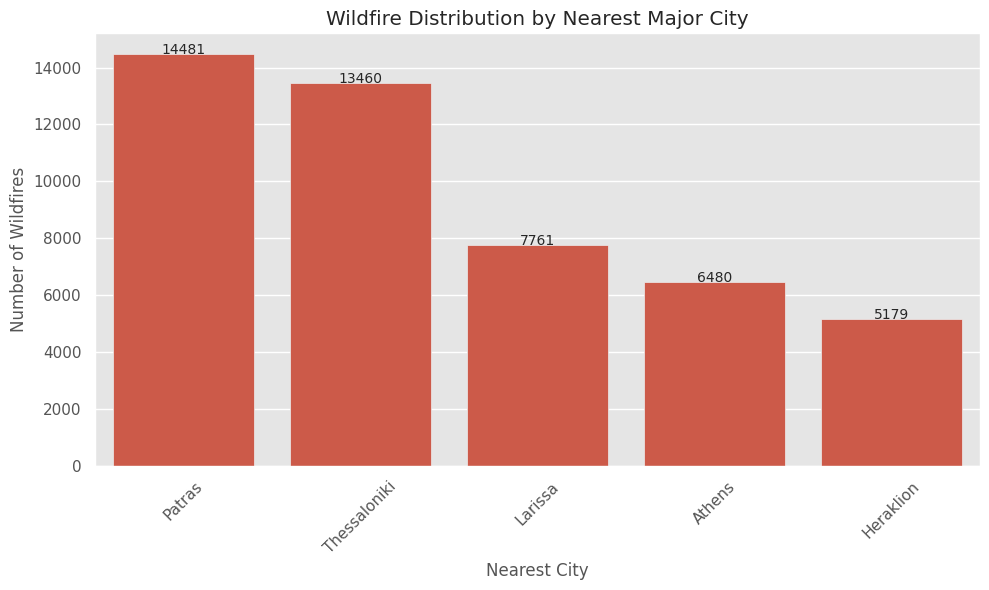

In [ ]:
analyze_coordinates_greece(df, lat_col='Y-ENGAGE', lon_col='X-ENGAGE')

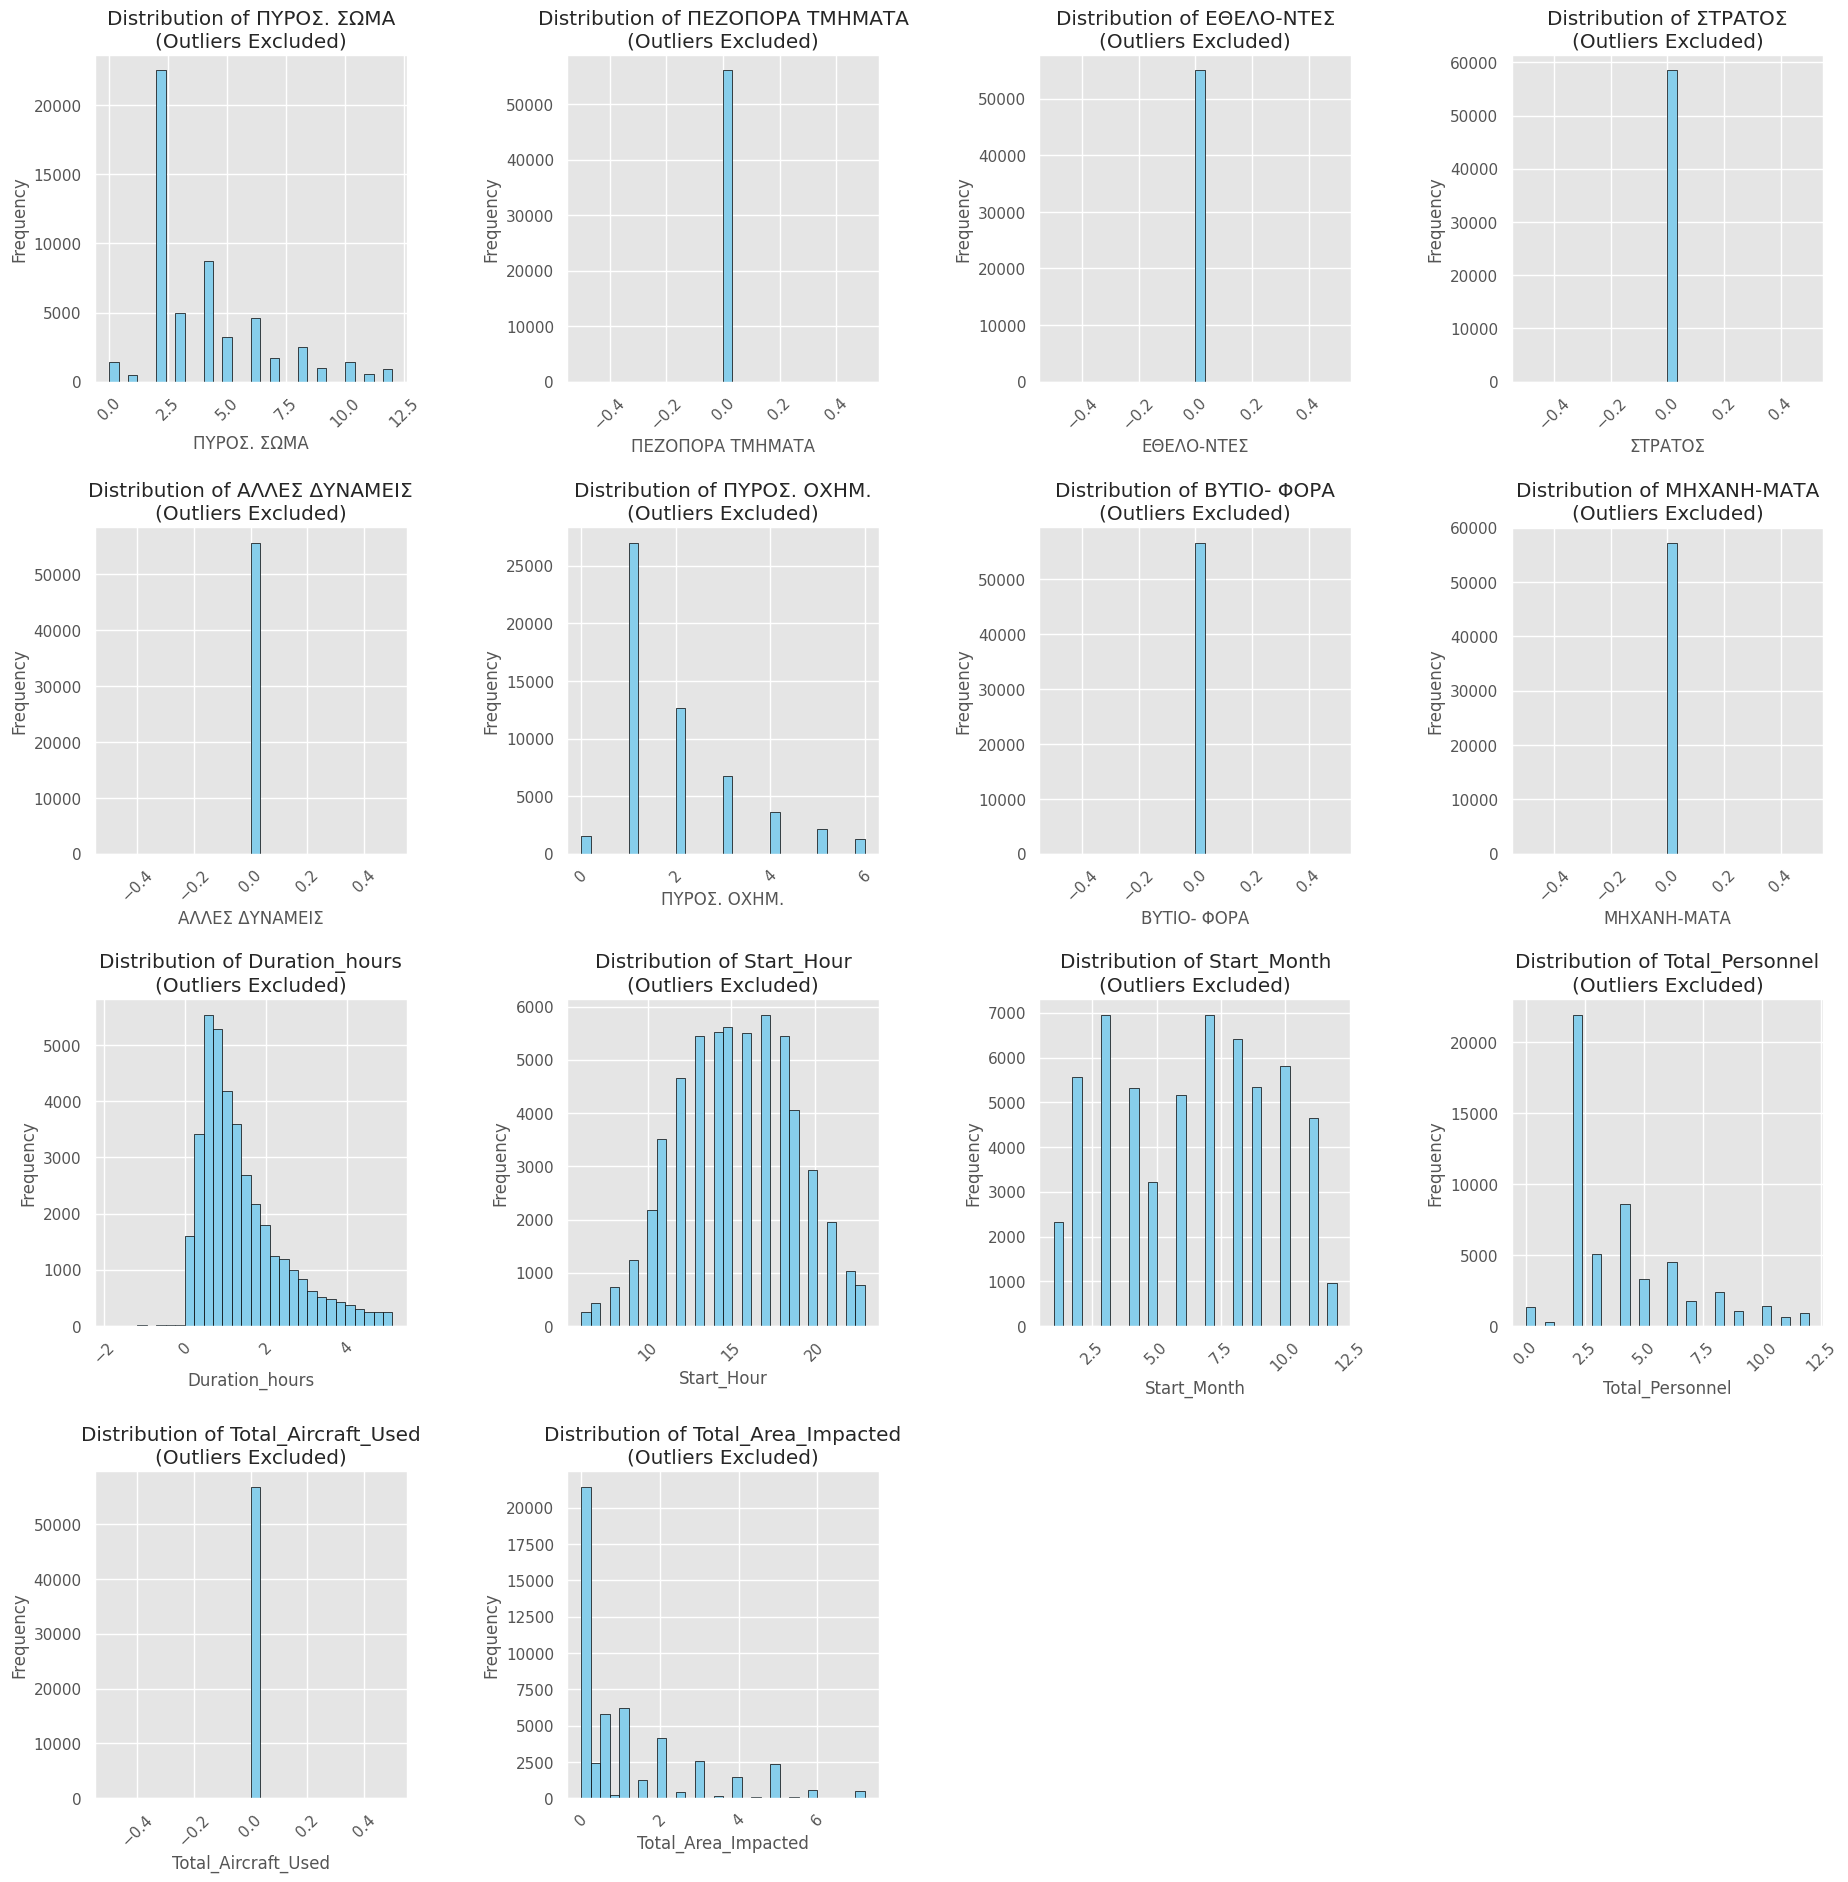

In [ ]:
numerical_cols = ['ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ', 'ΠΥΡΟΣ. ΟΧΗΜ.',
                  'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ', 'Duration_hours', 'Start_Hour', 'Start_Month', 'Total_Personnel',
                  'Total_Aircraft_Used', 'Total_Area_Impacted']

# plot the histogram excluding outliers in the same figure for every column (4 plots per row)
# Calculate number of rows needed (4 plots per row)
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4  # Round up division

# Create figure with subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))
fig.tight_layout(pad=8.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Calculate IQR to identify outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data excluding outliers
    filtered_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]

    # Plot histogram
    axes[i].hist(filtered_data, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}\n(Outliers Excluded)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()



Δήμος Analysis
Δήμος
Δ. ΠΥΡΓΟΥ                     0.029079
Δ. ΚΑΛΑΜΑΤΑΣ                  0.023611
Δ. ΠΕΛΛΑΣ                     0.020306
Δ. ΑΓΡΙΝΙΟΥ                   0.020170
Δ. ΙΕΡΑΣ ΠΟΛΗΣ ΜΕΣΟΛΟΓΓΙΟΥ    0.017972
                                ...   
Δ. ΕΥΟΣΜΟΥ-ΚΟΡΔΕΛΙΟΥ          0.000017
Δ. ΒΕΛΒΕΝΤΟΥ                  0.000017
Δ. ΓΑΛΑΤΣΙΟΥ                  0.000017
Δ. ΑΝΤΙΠΑΡΟΥ                  0.000017
Δ. ΣΥΜΗΣ                      0.000017
Name: proportion, Length: 307, dtype: float64


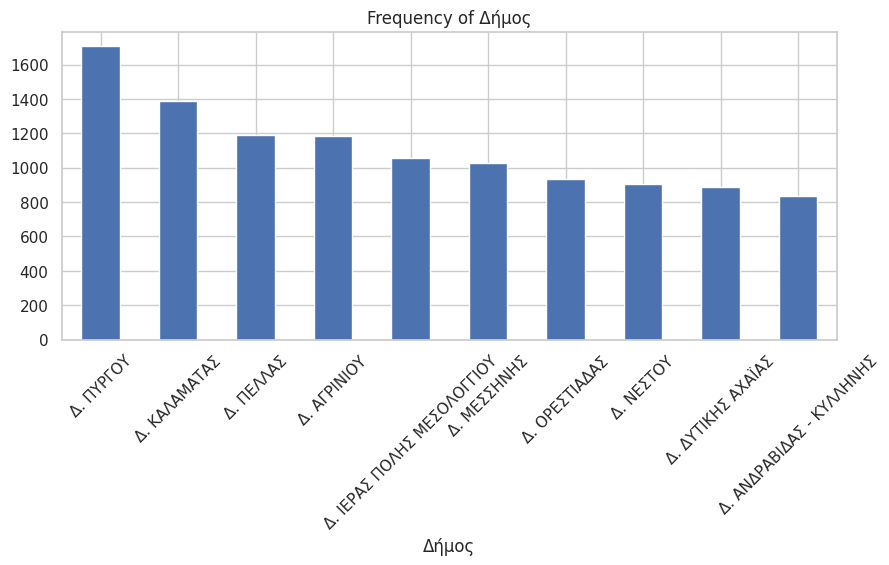


Υπηρεσία Analysis
Υπηρεσία
Π.Υ. ΚΑΛΑΜΑΤΑΣ                 0.039045
Π.Υ. ΠΥΡΓΟΥ                    0.029181
1ος  Π.Σ. ΛΑΡΙΣΑΣ              0.028755
Π.Υ. ΛΕΧΑΙΝΩΝ                  0.023798
Π.Υ. ΓΙΑΝΝΙΤΣΩΝ                0.022333
                                 ...   
2ος  Π.Σ. Π/Α ΣΟΥΔΑΣ ΧΑΝΙΩΝ    0.000017
ΕΘ.Π.Κ. ΒΑΘΕΟΣ ΣΑΜΟΥ           0.000017
ΔΙΟΙΚΗΣΗ Π.Υ. ΠΑΤΡΩΝ           0.000017
ΕΘ.Π.Κ. ΚΟΛΙΝΔΡΟΥ              0.000017
Π.Υ. Π/Α ΑΡΑΞΟΥ                0.000017
Name: proportion, Length: 278, dtype: float64


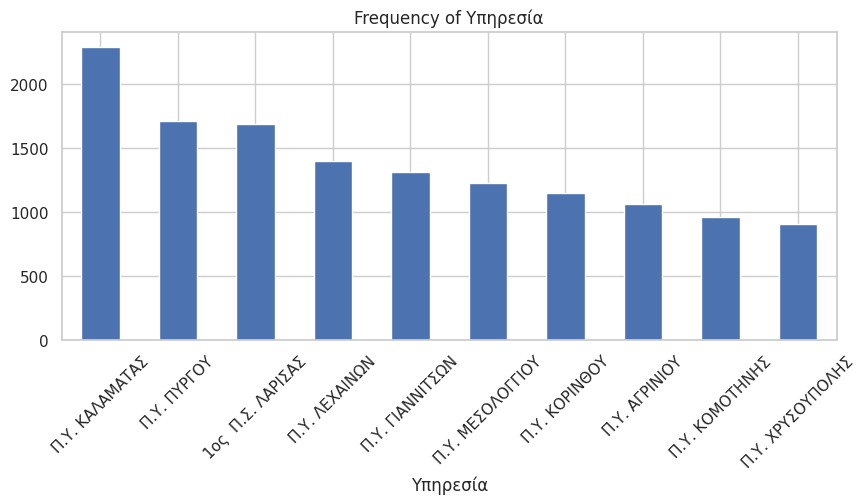


Περιοχή Analysis
Περιοχή
Unknown         0.472403
-               0.096419
ΑΓΡΙΝΙΟ         0.014616
ΜΕΣΟΛΟΓΓΙ       0.005588
ΠΥΡΓΟΣ          0.003458
                  ...   
ΚΑΛΑΝΔΑΡΕ       0.000017
ΠΕΡΒΟΛΑ         0.000017
ΧΡΥΣΩ           0.000017
ΧΩΜΑΤΑΔΑ        0.000017
ΧΩΡΑ ΣΦΑΚΙΩΝ    0.000017
Name: proportion, Length: 2923, dtype: float64


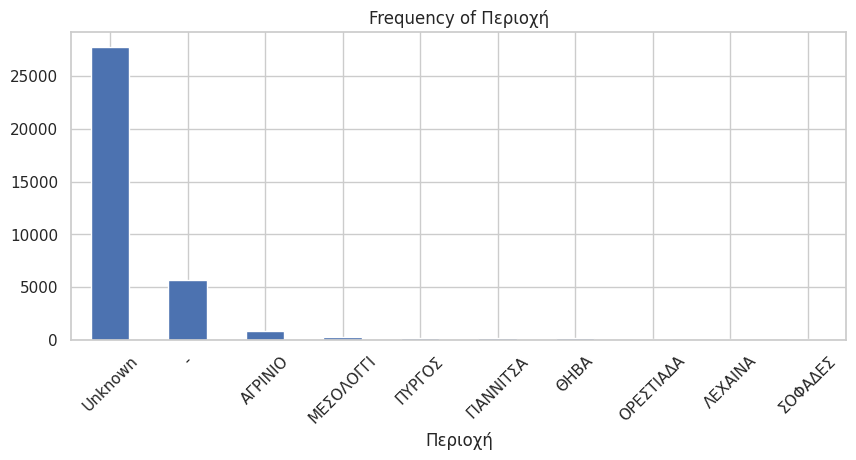


Νομός Analysis
Νομός
ΗΛΕΙΑΣ              0.078481
ΜΕΣΣΗΝΙΑΣ           0.063763
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ    0.054956
ΛΑΡΙΣΑΣ             0.053865
ΠΕΛΛΑΣ              0.042707
ΕΒΡΟΥ               0.039556
ΚΑΡΔΙΤΣΑΣ           0.033474
ΑΧΑΙΑΣ              0.030919
ΡΟΔΟΠΗΣ             0.029965
ΚΟΡΙΝΘΙΑΣ           0.029079
ΚΑΒΑΛΑΣ             0.027410
ΘΕΣΣΑΛΟΝΙΚΗΣ        0.026285
ΗΡΑΚΛΕΙΟΥ           0.023406
ΒΟΙΩΤΙΑΣ            0.023338
ΚΙΛΚΙΣ              0.022674
ΑΡΓΟΛΙΔΟΣ           0.021192
ΛΑΚΩΝΙΑΣ            0.020050
ΗΜΑΘΙΑΣ             0.019573
ΕΥΒΟΙΑΣ             0.018177
ΠΙΕΡΙΑΣ             0.018108
ΞΑΝΘΗΣ              0.017648
ΑΡΚΑΔΙΑΣ            0.017154
ΤΡΙΚΑΛΩΝ            0.017086
ΛΕΣΒΟΥ              0.017035
ΑΤΤΙΚΗΣ             0.015706
ΡΕΘΥΜΝΟΥ            0.015553
ΦΘΙΩΤΙΔΑΣ           0.014497
ΧΑΝΙΩΝ              0.014327
ΜΑΓΝΗΣΙΑΣ           0.014156
ΚΟΖΑΝΗΣ             0.012248
ΔΡΑΜΑΣ              0.011567
ΚΕΦΑΛΛΟΝΙΑΣ         0.011294
ΚΕΡΚΥΡΑΣ            0.011209
ΣΕΡΡΩΝ              0

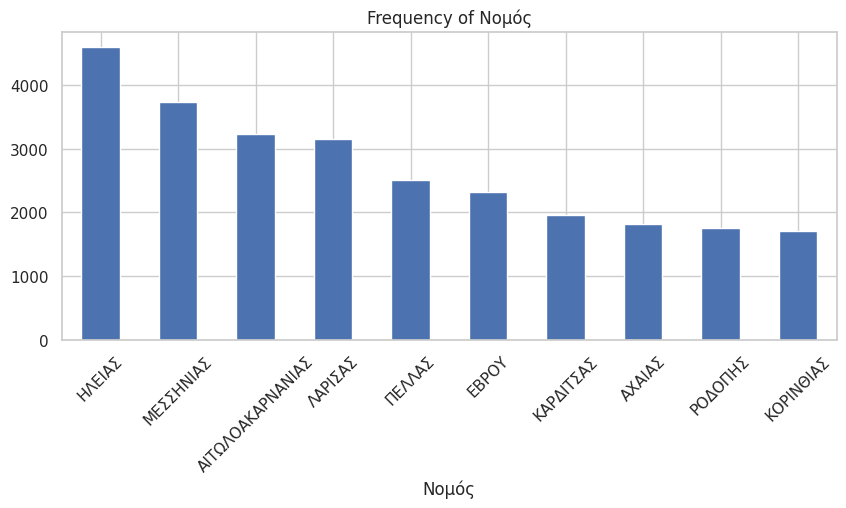


Day_of_Week Analysis
Day_of_Week
Sunday       0.153555
Saturday     0.152482
Friday       0.143470
Wednesday    0.140540
Thursday     0.137917
Monday       0.136367
Tuesday      0.135668
Name: proportion, dtype: float64


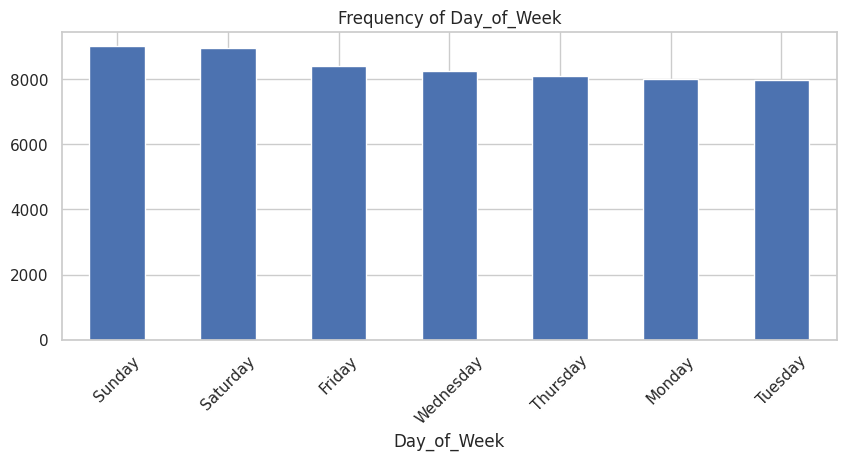


MISSING_COORDS Analysis
MISSING_COORDS
0    0.806804
1    0.193196
Name: proportion, dtype: float64


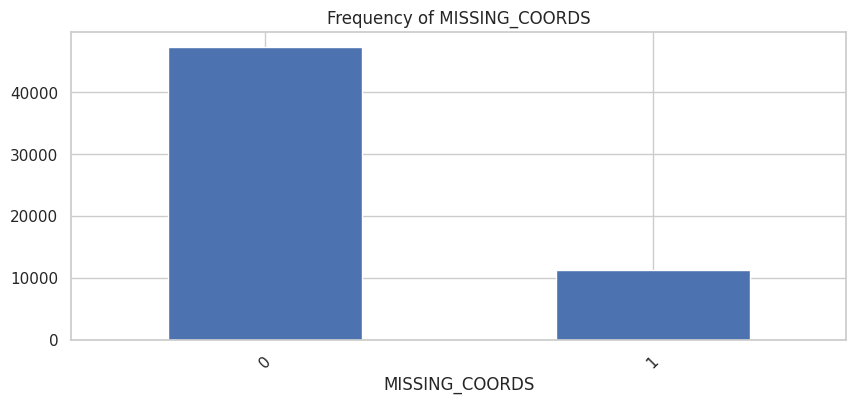


Unresolved Analysis
Unresolved
0    0.740963
1    0.259037
Name: proportion, dtype: float64


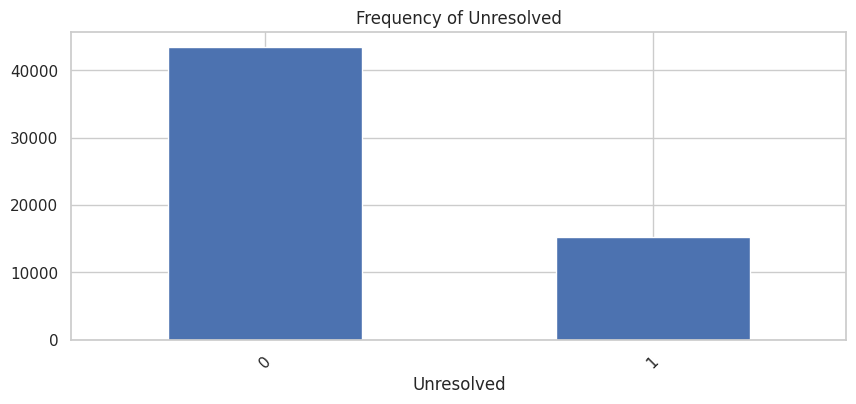


Aircraft_Used Analysis
Aircraft_Used
0    0.967616
1    0.032384
Name: proportion, dtype: float64


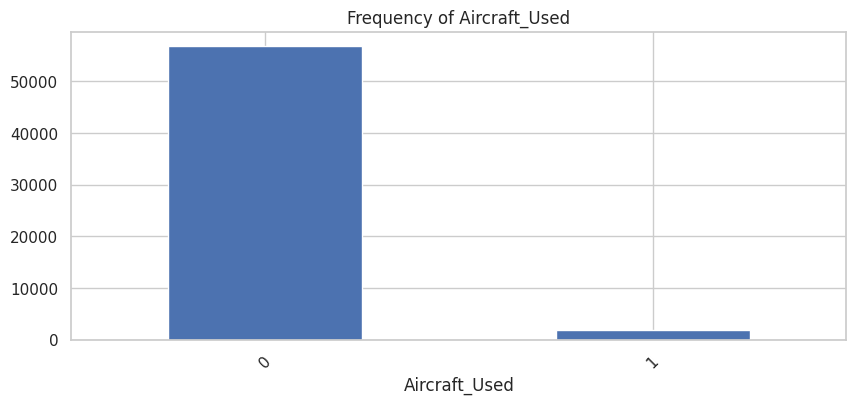


Dominant_Land_Type Analysis
Dominant_Land_Type
Χορτ/κές Εκτάσεις           0.259514
Καλάμια - Βάλτοι            0.216108
Γεωργικές Εκτάσεις          0.199363
Υπολλείματα Καλλιεργειών    0.137031
Δασική Έκταση               0.129944
Δάση                        0.037017
Σκουπι-δότοποι              0.019386
Άλση                        0.001635
Name: proportion, dtype: float64


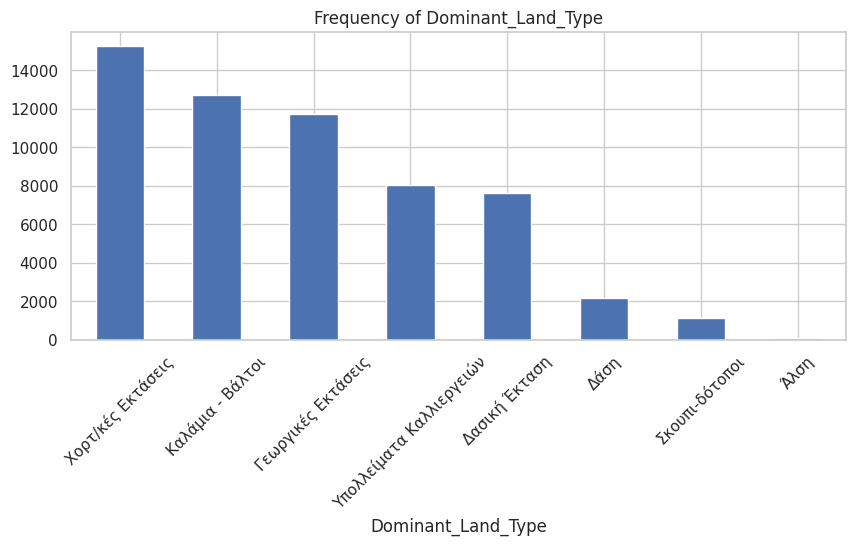


Season Analysis
Season
Summer    0.315952
Autumn    0.269326
Spring    0.263858
Winter    0.150864
Name: proportion, dtype: float64


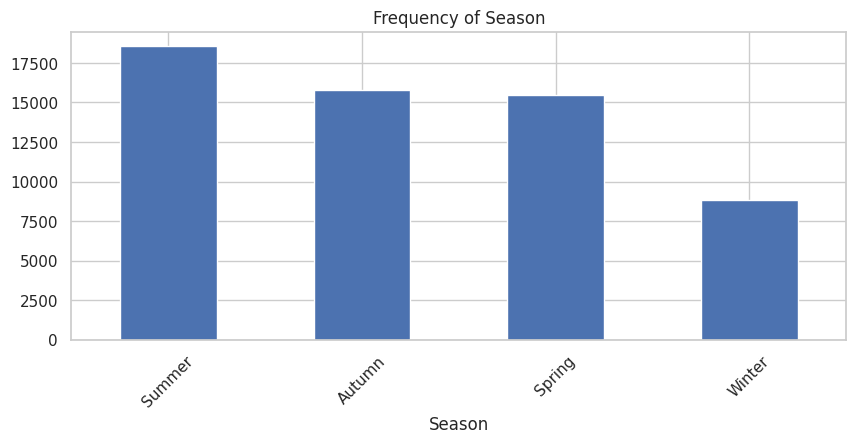

In [ ]:
categorical_cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
                    'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n\033[1m{col} Analysis\033[0m")
        print(df[col].value_counts(normalize=True))

        # Plot frequency
        plt.figure(figsize=(10, 4))
        if df[col].nunique() > 10:  # For high-cardinality features
            df[col].value_counts().head(10).plot(kind='bar')
        else:
            df[col].value_counts().plot(kind='bar')
        plt.title(f'Frequency of {col}')
        plt.xticks(rotation=45)
        plt.show()


Temporal Analysis


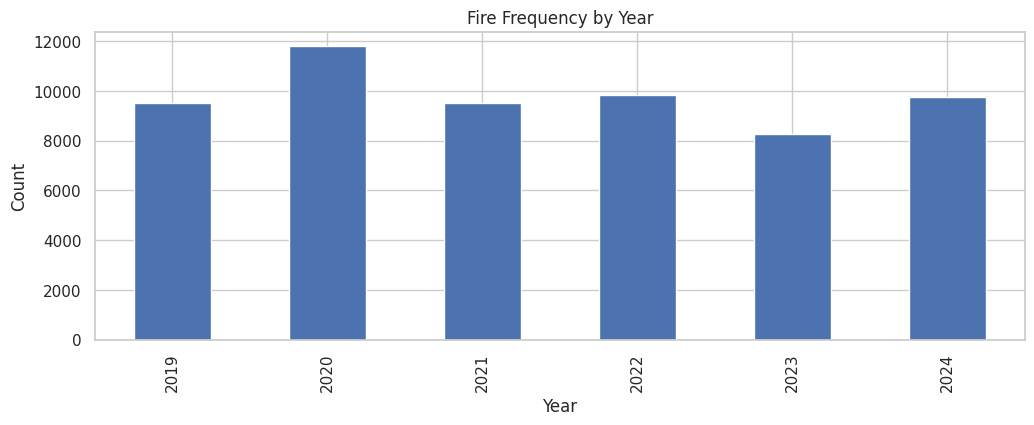

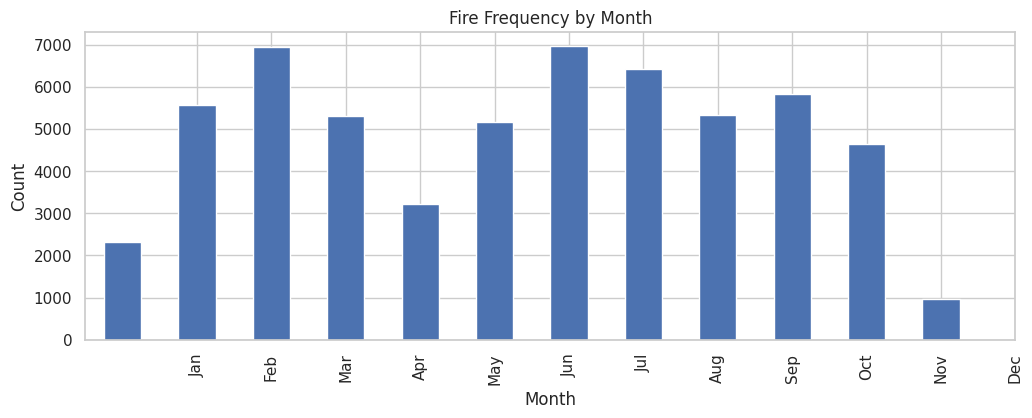

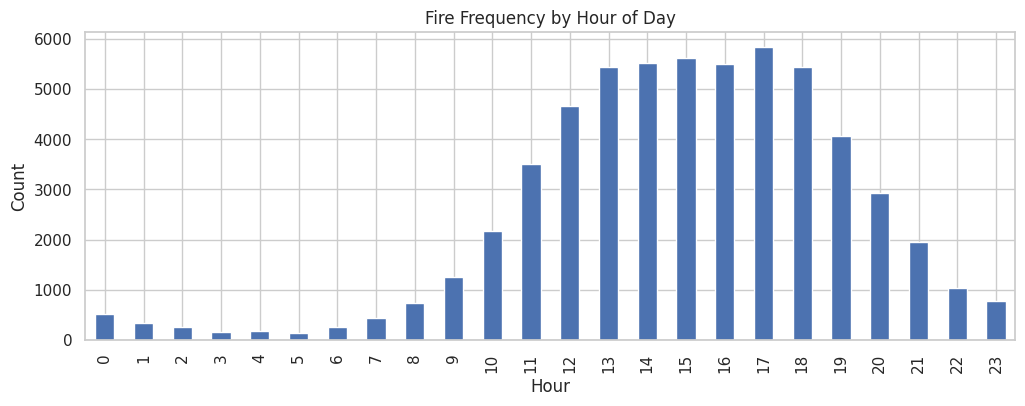

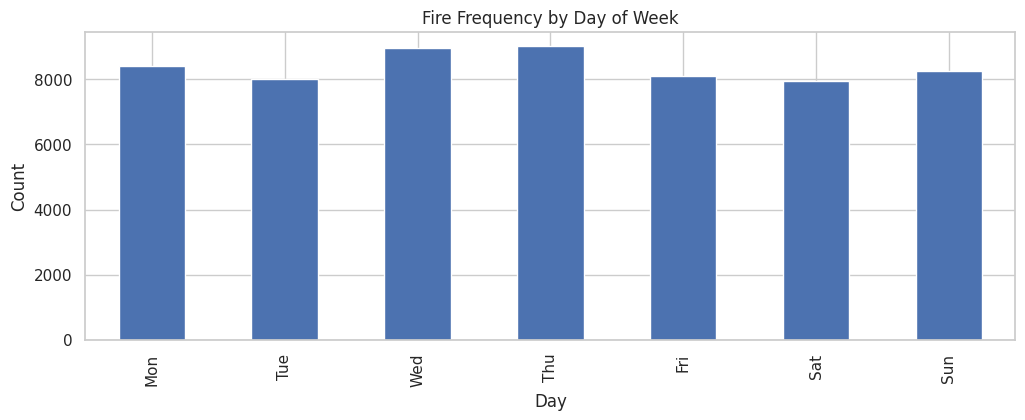

In [ ]:
# ========================================================================
# Temporal Features Analysis
# ========================================================================
if 'Start_Datetime' in df.columns:
    print("\n\033[1mTemporal Analysis\033[0m")

    # By year
    plt.figure(figsize=(12, 4))
    df['Start_Datetime'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Fire Frequency by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()

    # By month
    plt.figure(figsize=(12, 4))
    df['Start_Month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Fire Frequency by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

    # By hour
    plt.figure(figsize=(12, 4))
    df['Start_Hour'].value_counts().sort_index().plot(kind='bar')
    plt.title('Fire Frequency by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.show()

    # By day of week
    plt.figure(figsize=(12, 4))
    df['Day_of_Week'].value_counts().sort_index().plot(kind='bar')
    plt.title('Fire Frequency by Day of Week')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

#Multivariate Analysis